## Quick note about Jupyter cells

When you are editing a cell in Jupyter notebook, you need to re-run the cell by pressing `<Shift> + <Enter>`. This will allow changes you made to be available to other cells.

Use `<Enter>` to make new lines inside a cell you are editing.

### Code cells
Re-running will execute any statements you have written. To edit an existing code cell, click on it.

### Markdown cells
Re-running will render the markdown text. To edit an existing markdown cell, double-click on it.


### Common Jupyter operations

**Inserting and removing cells**

Use the "plus sign" icon to insert a cell below the currently selected cell
Use "Insert" -> "Insert Cell Above" from the menu to insert above

**Clear the output of all cells**

Use "Kernel" -> "Restart" from the menu to restart the kernel
click on "clear all outputs & restart" to have all the output cleared

**Show function signature**

Start typing function and hit `<Shift> + <Tab>`

# Preprocessing

## import necessary libraries

Import the following packages: `pandas as pd`, `csv`, `nltk` and `matplotlib.pyplot as plt`

In [1]:
import pandas as pd
import csv, nltk
import matplotlib.pyplot as plt

## load data

As we have done the step of collecting some sample data for you already, you only have to load the data into a pandas dataframe using the method `pd.read_csv()`. Typing a variable name into a jupyter cell and running it, shows you the current content.

In [2]:
tweets = pd.read_csv("../message_classification/data/tweets/tweets.tsv", sep="\t")
tweets.columns = ['id', 'sentiment', 'md5', 'list', 'text']

In [3]:
tweets

,id,sentiment,md5,list,text
0,364483696570945536,neutral,a6416685aa01bb28315ec81baa50639d,[],Not Available
1,373606425379225600,positive,e9f93f030ab466d8aa624d1bfb33d31b,[],Not Available
2,367189542857482240,neutral,c020aa23ff1f8ff985ce489b2b678674,[],Tainted Talents (Ateliertagebuch.) » Wir sind ...
3,368327046574776321,neutral,0096b66e311fffcca65c23d2a310083b,[],Aber wenigstens kommt #Supernatural heute mal ...
4,390690148188712960,positive,66ffcee70a34442d5e3df0b39e359d11,[],Not Available
...,...,...,...,...,...
9933,373714852122202112,negative,d0c4b34c6db04a64d074d2e46c57df62,[],@AstridSchiebs Okay. @DerAtrox Machse einfach!...
9934,376593709280034816,neutral,f3a201478826ba5b73ee0d70022a90a7,[],Öffentliche Pfeifturmbegehung Führung um 11:30...
9935,377180450500136961,positive,2c0c0c7538e0695bf137126cfcb9fb77,[],Not Available
9936,364054346767405056,positive,6b0352b5c96a7002897d5af3eb9a1c6f,[],"@FrauFlauschig Ich mag ihn auch echt gerne, ha..."


## inspect and clean data

The dataset contains several entries of messages that have been deleted by the user after posting them, use pandas' `str.contains()` or any other method like `loc` to remove all rows that represent a message not accessibly anymore ("Not Available").

In [4]:
tweets = tweets.drop(tweets[tweets['text'].str.contains("Not Available")].index)

In [5]:
tweets

,id,sentiment,md5,list,text
2,367189542857482240,neutral,c020aa23ff1f8ff985ce489b2b678674,[],Tainted Talents (Ateliertagebuch.) » Wir sind ...
3,368327046574776321,neutral,0096b66e311fffcca65c23d2a310083b,[],Aber wenigstens kommt #Supernatural heute mal ...
5,368309870673793024,neutral,575fd73efa41e07e2b0c360a721d19d7,[],DARLEHEN - Angebot für Schufa-freie Darlehen: ...
6,362896018389475328,neutral,8b824c765a7642a980b9e14c02830126,[],ANRUF ERWÜNSCHT: Hardcore Teeny Vicky Carrera:...
7,367912309303148545,neutral,a07f6bc77b0cfb06a75c7cb1a88d752b,[],Na? Wo sind Frankens heimliche Talente? - Die ...
...,...,...,...,...,...
9930,389730420356427776,neutral,487bb8fdeddd340744ecad712e80dc8f,[],Wirtschaftsminister Mitterlehner zeichnet café...
9931,365216013760991234,neutral,0412287b1ec1aa17992690bc932e01b7,[],"CL-Qualifikation: Zenit mit Kantersieg, Austri..."
9933,373714852122202112,negative,d0c4b34c6db04a64d074d2e46c57df62,[],@AstridSchiebs Okay. @DerAtrox Machse einfach!...
9934,376593709280034816,neutral,f3a201478826ba5b73ee0d70022a90a7,[],Öffentliche Pfeifturmbegehung Führung um 11:30...


The columns we are most interested in are "text" and "sentiment". Use pandas' `groupby()` method in combination with `count()` to get a first notion about the distribution of our labels. 

Drop the rest of the columns to retain a dataframe with the two columns "text" and "sentiment".

Use the pandas function `str.replace()` to get rid of [twitter handles](https://www.urbandictionary.com/define.php?term=twitter%20handle) (hint: use regular expressions with `r'my_regex'` as the first argument `in str.replace()`).

**Advanced**
- Get rid of links. 
- Inspect the rest of the columns and keep some if they might contain information relevant to our prediction at a later stage.

In [6]:
tweets.groupby(['sentiment'])['sentiment'].count()

sentiment
negative    1001
neutral     4211
positive    1546
Name: sentiment, dtype: int64

In [7]:
tweets = tweets.drop(['id', 'md5', 'list'], axis=1)

In [8]:
#  remove twitter handles
tweets['text'] = tweets['text'].str.replace(r"(?<![\w.-])@[A-Za-z][\w-]+", "")
# url removal
tweets['text'] = tweets['text'].str.replace(r"https?:\/\/.*[\r\n]*", "")

tweets['text'] = tweets['text'].str.strip()


# There are empty texts that need removing
tweets['text'].replace("", pd.NA, inplace=True)

tweets = tweets.dropna()
# maybe some of the columns have unique number? could be used to identify duplicates? retweets might introduce duplicate data and bias

c:\Projects-G15\abticket\coding-assessment-full-stack\.venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Projects-G15\abticket\coding-assessment-full-stack\.venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [9]:
tweets['text']

2       Tainted Talents (Ateliertagebuch.) » Wir sind ...
3       Aber wenigstens kommt #Supernatural heute mal ...
5       DARLEHEN - Angebot für Schufa-freie Darlehen: ...
6       ANRUF ERWÜNSCHT: Hardcore Teeny Vicky Carrera:...
7       Na? Wo sind Frankens heimliche Talente? - Die ...
                              ...                        
9930    Wirtschaftsminister Mitterlehner zeichnet café...
9931    CL-Qualifikation: Zenit mit Kantersieg, Austri...
9933                           Okay.  Machse einfach! EU.
9934    Öffentliche Pfeifturmbegehung Führung um 11:30...
9936     Ich mag ihn auch echt gerne, haste fein gemacht!
Name: text, Length: 6727, dtype: object

## create single string to count word frequencies

In order to visualize word frequencies, we will concatenate all messages to create one long string containing all words present in these messages. 

Use `str.cat()` with `sep=' '` on the column 'text' to create one string containing all messages.

In [10]:
merged_tweets = tweets['text'].str.cat(sep=" ")

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Pass merged_tweets to the `nltk` method `word_tokenize()` to create a list of tokens.

In [12]:
merged_tweets_tokens = nltk.word_tokenize(merged_tweets, language='german')

We will use matplotlib to plot token frequencies. Set the matplotlib figure size to `(15, 8)` in order to create a larger plot area. 
Pass `merged_tweets_tokens` to `nltk.FreqDist()`, save the result as `fd` and call `fd.plot()` with `(50,cumulative=False)`.

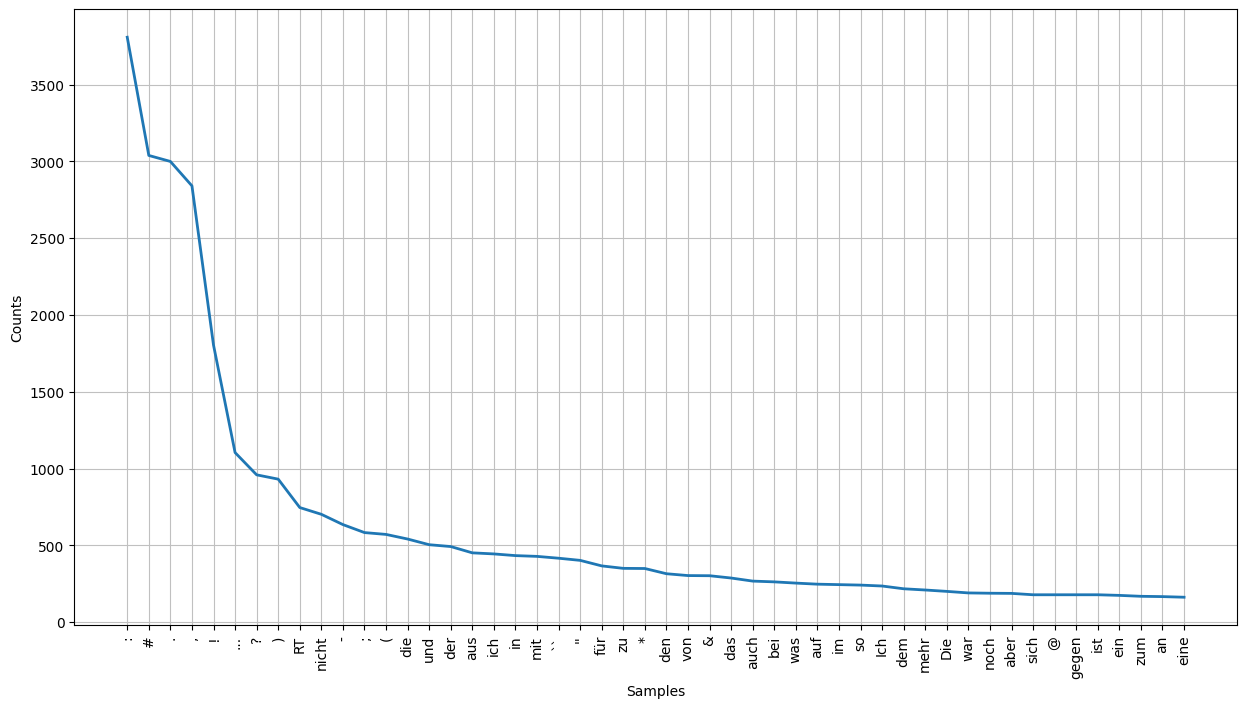

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
# plot token frequencies
plt.figure(figsize=(15, 8))  


fd = nltk.FreqDist(merged_tweets_tokens)
fd.plot(50, cumulative=False)

## save data

Use the pandas `to_csv()` method to save your dataframe as a .csv file. Name it "training_data_tweets.csv", set `encoding='utf-8'`, use `quoting=csv.QUOTE_ALL`, `header=False` and `index=False`.

In [14]:
# save the dataframe in a format you can easily import in the following notebook
tweets.to_csv("../message_classification/data/training_data_tweets.csv", 
                encoding="utf-8", 
                quoting=csv.QUOTE_ALL,
                header=False,
                index=False)